# DGSATI-HST.ipynb

In [1]:
from pylab import *

In [2]:
tv = genfromtxt('DGSAT-I_ACS_F606W_sci.txt',skip_header=28,dtype=None) # jdcs01020_drc.fits
idv, x, y = tv['f0'], tv['f1'], tv['f2']
m3v, m7v, mv = tv['f9'], tv['f13'], tv['f29'] # 3, 7 pix aperture mags; MAG_AUTO : should use MAG_ISO for colors
# AB mags, calculated by Steve from header PHOTFLAM,PHOTPLAM, see here:
# http://www.stsci.edu/sites/www/home/hst/instrumentation/acs/data-analysis/zeropoints.html
PHOTFLAM, PHOTPLAM = 7.814326625E-20, 5.9219517E+03
ZP_AB = -2.5 * log10(PHOTFLAM) - 5.0 * log10(PHOTPLAM) - 2.408
print('F606W zeropoint = %.3f AB mag' % (ZP_AB))

ti = genfromtxt('DGSAT-I_ACS_F814W_sci.txt',skip_header=28,dtype=None) # jdcs01010_drc.fits
idi, m3i, m4i, m5i, m7i, m10i, mi = ti['f0'], ti['f9'], ti['f10'], ti['f11'], ti['f13'], ti['f16'], ti['f29'] # 3, 4, 5, 7, 10 pix aperture mags; MAG_AUTO
classi, flagsi = ti['f42'], ti['f43']
PHOTFLAM, PHOTPLAM = 7.04932655E-20, 8.0449937E+03
ZP_AB = -2.5 * log10(PHOTFLAM) - 5.0 * log10(PHOTPLAM) - 2.408
print('F814W zeropoint = %.3f AB mag' % (ZP_AB))


F606W zeropoint = 26.497 AB mag
F814W zeropoint = 25.944 AB mag


In [3]:
C37i = m3i - m7i # concentration 
C47i = m4i - m7i # concentration
C410i = m4i - m10i # concentration
C510i = m5i - m10i # concentration
#pti = where((C410i>0.49)&(C410i<0.68))[0]
#pti = where((C410i>0.49)&(C410i<0.75))[0]
pt410i = where((C410i>0.49)&(C410i<0.75))[0]
pt37i = where((C37i>=0.65)&(C37i<=0.85))[0]

In [4]:
# https://ned.ipac.caltech.edu/cgi-bin/objsearch?search_type=Obj_id&objid=680916359&objname=1&img_stamp=YES&hconst=73.0&omegam=0.27&omegav=0.73&corr_z=1
mv0, mi0, = mv - 0.130, mi - 0.080 # from NED/Schlafly+11
v_i = mv - mi  # don't do this, use matched apertures!
v_i0 = mv0 - mi0 # This is really (F606W-F814W)_0 AB mag

v_iV0 = (mv0 - 0.088) - (mi0 - 0.436) # AB -> Vega mag for (F606W-F814W)_0; from Sirianni+05 Table 5
mvV0 = mv0 - 0.088
# using this webpage below, the results using the Sun or Vega would be slightly different:
# http://mips.as.arizona.edu/~cnaw/sun.html
#V_I0 = (mv0 - 0.065) - (mi0 - 0.40) # AB -> Vega mag for (F606W-F814W)_0

V_I0 = 1.2 * (v_iV0) + 0.056 # now this is true (V-I)_0 (Vega),
# DeGraaff+07 eqn 3, as used in Peng+09 Sec 3.1; based on empirical color profile of S0 galaxy:
#   note that it is calibrated for a redder range than we need here, and would have also been a problem for 
#   Peng's M87 GC dataset (they did mention some caveats)
#    i.e., calibrated at (F606W-F814W)_0 ~ 0.93-0.97 Vega, (V-I)_0 ~ 1.16-1.22 Vega

mI0 = mi0 - 25.937 + 25.495 - 0.002 * V_I0 # true I-band Vega mag, folowing Peng and Sirianni App D, Table 22
mV0 = mv0 - 26.486 + 26.325 + 0.236 * V_I0 # as above
# Peng & Lim 2016 said V - V606 = 0.13 mag (description unclear), while here V - V606W ~ 0.05 mag;
#  Beasley & Trujillo 2016 said V - V606 = 0.14 mag based on Vazdekis models

#V_I0 = V_I - (0.144 - 0.079) 
# from NED/Schlafly+11 : doing filter then extinction corrections would hopefully give same answer as vice-versa

# Peng+09 Appendix finds GCLF TOM of M_I = -8.85 +/- 0.06 Vega for the M87 blue GCs
# If we assume a DGSAT~I distance of 76.4 +/- 5.4 Mpc, (m-M) = 34.42 +/- 0.15 mag from NED (Virgo infall only)
#  (note we used D = 78 Mpc in Martin-Navarro+09), then we expect I0 = 25.57 +/- 0.16 Vega for TOM
# Beasley & Trujillo discuss M_I = -8.12 or -7.67 AB -> should translate to ~ -8.53 or -8.08 Vega
#   -> use the latter, get I0 = 26.34 Vega

# Peng & Lim say M_V=-7.3 for low-mass galaxy from Miller & Lotz, so expect V0 = 27.12 for TOM
# -> based on color above, expect F606W0 ~ 27.07; note van Dokkum+18 said V606 ~ 27.6 for Coma, which seems similar

In [5]:
x0,y0 = 2192.8, 3241.0  # galaxy centroid by eye: need GALFIT centroid?
R = sqrt((x-x0)**2 + (y-y0)**2)
#UDG_GC = where(R < 314.0)[0]

x0,y0 = 2254.3, 3180.2  # clump center by eye
Rclump = sqrt((x-x0)**2 + (y-y0)**2)
clump = where(Rclump < 63.0)[0]
print('clump source IDs: ',clump)

GCcol = where( (v_i0 > 0.1) & (v_i0 < 0.6) )[0]
GCcolmag = where( (v_i0 > 0.1) & (v_i0 < 0.6) & (mv0 > 23.5))[0]
starcolmag = where( (v_i0 > 0.1) & (v_i0 < 0.6) & (mv0 < 23.5))[0]

# note that faint-mag cut eliminates ~half the contaminants (this is approx the TOM)
#GC = where((C410i>0.49)&(C410i<0.75)&(V_I0 > 0.8)&(V_I0 < 1.0)&(mi<26.5))[0]

GC = where( (C410i>0.49) & (C410i<0.75) &(v_i0 > 0.1) & (v_i0 < 0.6) & (mv0 > 23.5))[0]

print(idv[GC])

#UDG_GC = where((C410i>0.49)&(C410i<0.75)&(V_I0 > 0.8)&(V_I0 < 1.0)&(R<314.0)&(mi<26.5))[0]
UDG_GC = where((C410i>0.49)&(C410i<0.75)&(v_i0 > 0.1)&(v_i0 < 0.6)&(R<314.0)&(mv0>23.5))[0]
print('UDG GC candidate IDs =', idi[UDG_GC] )

UDG_pt = where((C410i>0.49)&(C410i<0.75)&(R<314.0))[0]
print(UDG_pt)

# identify visually GC candidates around DGSAT~I :
GC_eye = array([311,365,376,394,443,466,574,678]) - 1
print('C_4-10 =', C410i[GC_eye] )
print('V_606,0 =', mv0[GC_eye])
print('V_606 - I_814 =', v_i0[GC_eye])
print('(V-I)_0 =', V_I0[GC_eye] )

clump source IDs:  [454 456 459 471 474 476 477 482 496 497 498]
[  63  131  146  198  283  306  309  311  317  324  375  376  382  388
  399  410  430  438  448  457  459  466  484  505  523  536  537  548
  561  574  627  649  663  725  733  830  836  897  900  917  937  949
 1015 1068 1144 1255 1315 1404 1409 1452 1460 1483 1504 1524 1566 1576
 1580 1656 1666 1704 1724 1763 1771 1776 1836 1845 1881]
UDG GC candidate IDs = [311 376 382 388 399 448 457 466 536 574]
[310 357 364 375 381 387 392 398 442 447 456 465 474 482 497 498 535 538
 551 573]
C_4-10 = [0.7171 0.5795 0.6079 1.2775 0.5399 0.7491 0.6267 0.8471]
V_606,0 = [24.9012 23.7058 25.1648 26.8495 23.8235 23.7843 25.1359 23.96  ]
V_606 - I_814 = [0.4115 2.0272 0.2864 0.9545 1.4076 0.3924 0.369  0.5505]
(V-I)_0 = [0.9674  2.90624 0.81728 1.619   2.16272 0.94448 0.9164  1.1342 ]


In [6]:
R_GC = sort(R[GC]) * 0.05 # pix -> arcsec; note R_e ~ 12.4 arcsec
N_GC = range(1,len(R_GC)+1) # cumulative number of GCs, up to 15
Sig_GC = N_GC / ( pi * R_GC**2) # enclosed surface density distribution, not corrected for vignetting
print(R_GC)
print(Sig_GC)
# looks like 7 contaminants per ~22000 arcsec**2 -> expect ~0.35 objects on DGSAT~I 
#Sig_back = 0.00035

# -> (4-0.35)*4 = 14.6 GCs, S/N ~ 4.4 +/- 2.2 (2-7)
# Harris+17 in vD+17: log Mh = 9.62 + 1.12 * log N_GC ~ 10.9 (10.6-11.1)

[  2.24201581   4.11245938   4.13696172   6.85166615   7.49237634
   7.84600791   8.37741394  11.58365023  14.60742518  14.88052856
  18.93927923  21.30209832  21.82577672  22.19764287  23.55345211
  24.79218368  26.2367773   26.41511841  36.95800579  37.53517039
  39.32811681  45.13077785  46.23882209  48.86719271  49.65824273
  51.30981713  55.36661435  57.19455653  57.42291552  61.11871702
  62.99909166  66.03890524  66.52262581  68.10826436  72.91558644
  75.86532037  81.71033322  81.75340822  81.98407576  82.27450959
  83.77252894  85.10591881  85.48717465  87.1487271   89.60028095
  90.29858927  91.9703619  109.57735566 109.88141596 109.96789646
 114.13732659 117.10764261 122.58743596 123.89679754 125.80102462
 130.50394857 136.67351258 142.00423343 144.8113422  147.27398406
 154.6620872  158.0464025  158.49549346 161.26725072 164.32211344
 165.90170564 187.86461502]
[0.06332465 0.03764236 0.05579668 0.02712175 0.02835182 0.03102444
 0.03174887 0.01897795 0.01342596 0.01437518 0.

In [7]:
#%matplotlib inline
rcParams.update({'font.size': 20})

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field (F606W)')

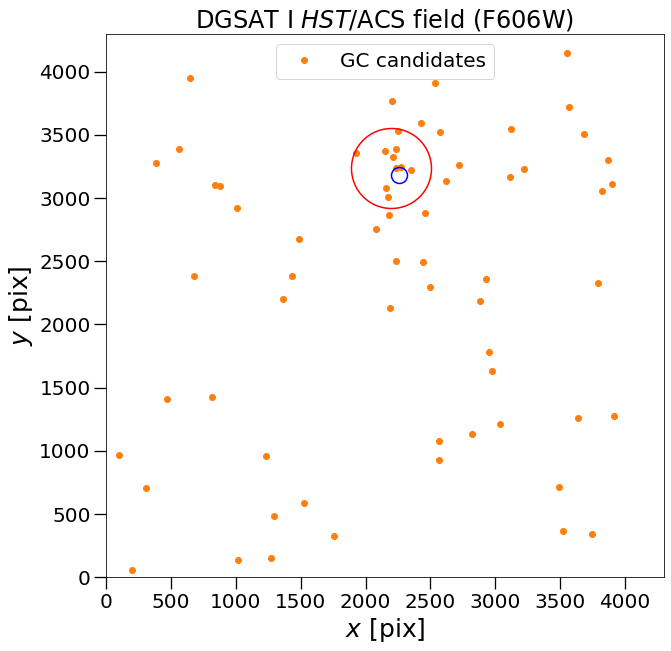

In [23]:
fig1 = figure(figsize=(10,10))
#plot(x,y,'o',c='#888888')
#plot(x[GC_eye],y[GC_eye],'or')
plot(x[GC],y[GC],'o',c='C1',label='GC candidates')
#plot(x[starcolmag],y[starcolmag],'o',c='C1',label='GC-color stars?')
#plot(x[UDG_GC],y[UDG_GC],'or')
plot([2192.8],[3241.0],'o',mfc='None',mec='r',ms=80,mew=1.5) # galaxy center by eye in HST image; radius ~ 314 pix ~ 1.3 R_e
plot([2254.3],[3180.2],'o',mfc='None',mec='b',ms=16,mew=1.5) # clump by eye in HST image; radius ~ 63 pix
#plot([1878.8,2506.7,2506.7,1878.8,1878.8],[2927.1,2927.1,3555.0,3555.0,2927.1],'-r')
#plot([2191.3,2317.3,2317.3,2191.3,2193.3],[3117.2,3117.2,3243.2,3243.2,3117.2],'-b')
xlabel('$x \,\, \mathrm{[pix]}$',fontsize=25)
ylabel('$y \,\, \mathrm{[pix]}$',fontsize=25)
#xlim(1878.8,2506.7); ylim(2927.1,3555.0)
xlim(0,4300); ylim(0,4300)
legend(loc='best')
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field (F606W)')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field (F606W)')

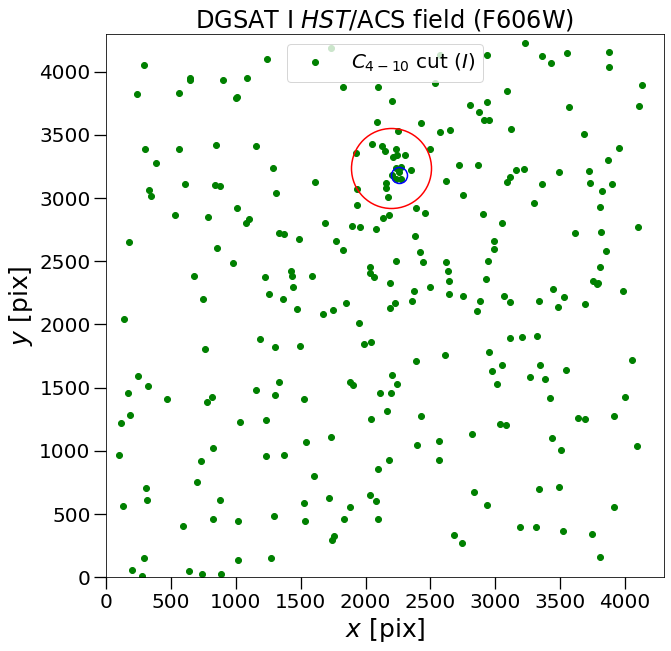

In [9]:
fig1b = figure(figsize=(10,10))
#plot(x,y,'o',c='#888888')
#plot(x[pt37i],y[pt37i],'og',label='$C_{3-7}$ cut ($I$)')
plot(x[pt410i],y[pt410i],'og',label='$C_{4-10}$ cut ($I$)')
#plot(x[GCcol],y[GCcol],'o',c='C1',label='color cut')
#plot(x[GCcolmag],y[GCcolmag],'o',c='C1',label='color/mag cut')
plot([2192.8],[3241.0],'o',mfc='None',mec='r',ms=80,mew=1.5) # galaxy center by eye in HST image; radius ~ 314 pix
plot([2254.3],[3180.2],'o',mfc='None',mec='b',ms=16,mew=1.5) # clump by eye in HST image; radius ~ 63 pix
#plot([1878.8,2506.7,2506.7,1878.8,1878.8],[2927.1,2927.1,3555.0,3555.0,2927.1],'-r')
#plot([2191.3,2317.3,2317.3,2191.3,2193.3],[3117.2,3117.2,3243.2,3243.2,3117.2],'-b')
xlabel('$x \,\, \mathrm{[pix]}$',fontsize=25)
ylabel('$y \,\, \mathrm{[pix]}$',fontsize=25)
#xlim(1878.8,2506.7); ylim(2927.1,3555.0)
xlim(0,4300); ylim(0,4300)
legend(loc='best')
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field (F606W)')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field (F814W)')

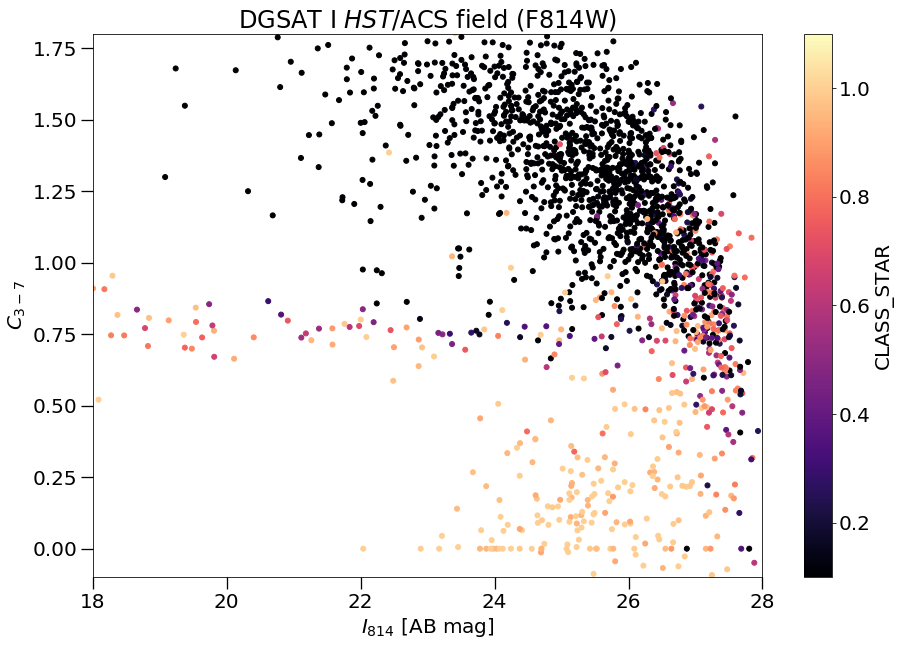

In [10]:
# reproducing Steve Janssen's concentration.png
fig2 = figure(figsize=(15,10))
ax=fig2.add_subplot(111)
#plot(mi,C37i,'o',c='#888888')
cs = ax.scatter(mi,C37i,s=25,alpha=1,c=classi,vmin=0.1,vmax=1.1,cmap=cm.magma)
cbar = fig2.colorbar(cs)
cbar.set_label('CLASS_STAR')
#plot(V_I[UDG_GC],mi[UDG_GC],'or')
#legend(loc='best')
#xlabel('$m_\mathrm{F814W}$ [AB mag]')
xlabel('$I_\mathrm{814}$ [AB mag]')
ylabel('$C_{3-7}$')
#xlim(16,29); 
xlim(18,28)
#ylim(-0.7,3.0)
ylim(-0.1,1.8)
#ylim(0.3,1.2) # C ~ 0.65-0.85 ?
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field (F814W)')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field (F814W)')

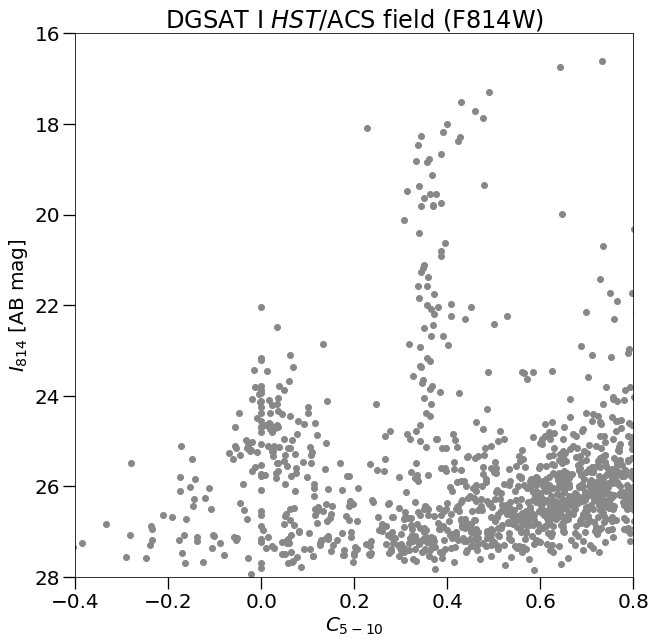

In [11]:
# trying approach of Beasley & Trujillo (2016), Fig 2
fig3 = figure(figsize=(10,10))
plot(C510i,mi,'o',c='#888888')
#legend(loc='best')
#ylabel('$m_\mathrm{F814W}$ [AB mag]')
ylabel('$I_\mathrm{814}$ [AB mag]')
xlabel('$C_{5-10}$')
xlim(-0.4,0.8); ylim(28,16)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field (F814W)')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field (F814W)')

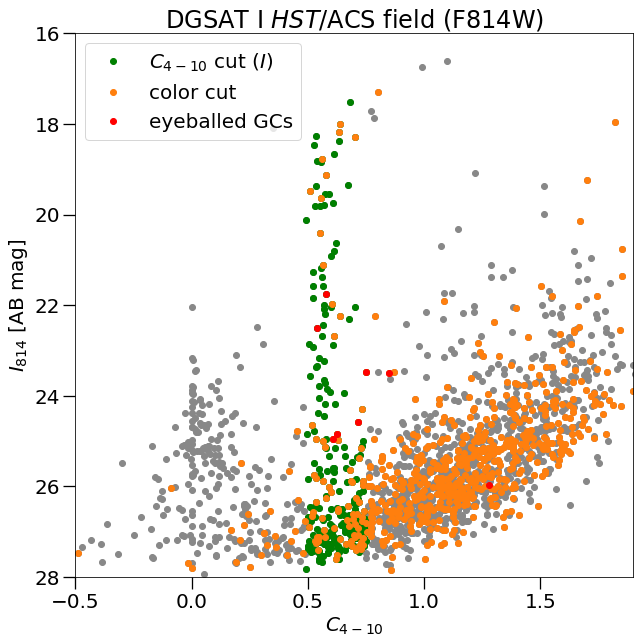

In [12]:
# trying approach of Peng+11 Fig 2
fig4 = figure(figsize=(10,10))
plot(C410i,mi,'o',c='#888888')
plot(C410i[pt410i],mi[pt410i],'og',label='$C_{4-10}$ cut ($I$)')
plot(C410i[GCcol],mi[GCcol],'o',c='C1',label='color cut')
plot(C410i[GC_eye],mi[GC_eye],'or',label='eyeballed GCs')
legend(loc='best')
#ylabel('$m_\mathrm{F814W}$ [AB mag]')
ylabel('$I_\mathrm{814}$ [AB mag]')
xlabel('$C_{4-10}$')
xlim(-0.5,1.9); ylim(28,16)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field (F814W)')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field (F814W)')

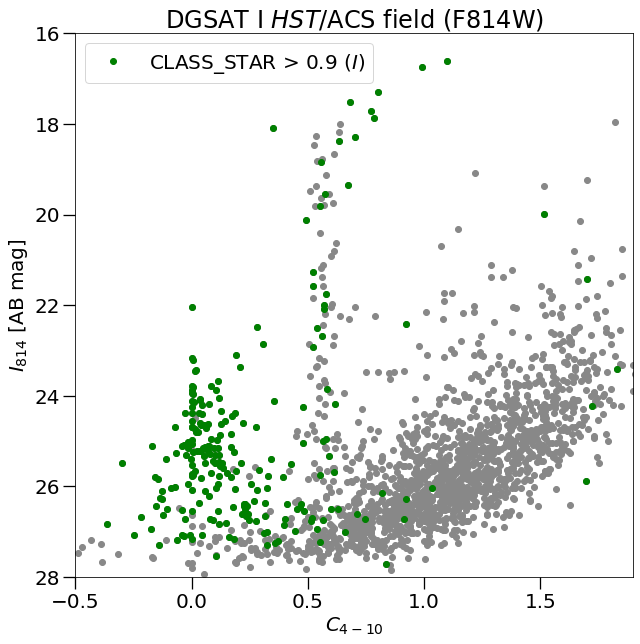

In [13]:
# trying approach of Peng+11 Fig 2
fig4b = figure(figsize=(10,10))
plot(C410i,mi,'o',c='#888888')
plot(C410i[classi>0.9],mi[classi>0.9],'og',label='CLASS_STAR > 0.9 ($I$)')
legend(loc='best')
#ylabel('$m_\mathrm{F814W}$ [AB mag]')
ylabel('$I_\mathrm{814}$ [AB mag]')
xlabel('$C_{4-10}$')
xlim(-0.5,1.9); ylim(28,16)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field (F814W)')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field (F814W)')

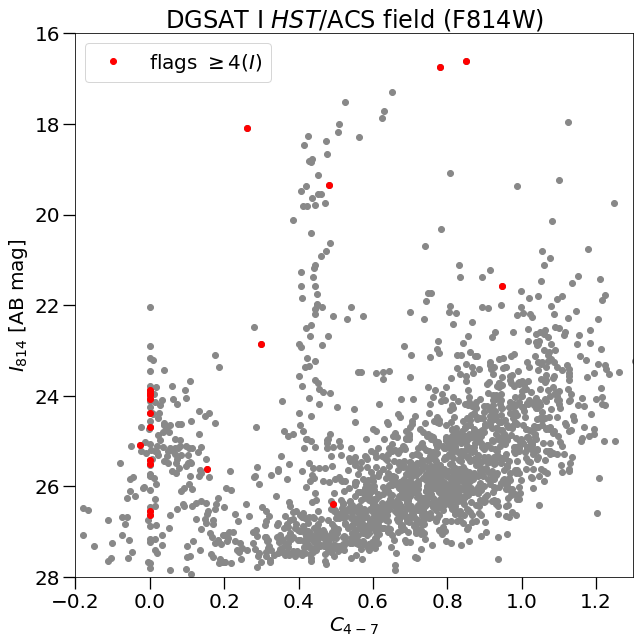

In [14]:
# trying approach of Peng & Lim (2016); Lim+18
fig5 = figure(figsize=(10,10))
plot(C47i,mi,'o',c='#888888')
plot(C47i[flagsi>=4],mi[flagsi>=4],'or',label='flags $\geq4 (I)$')
legend(loc='best')
#ylabel('$m_\mathrm{F814W}$ [AB mag]')
ylabel('$I_\mathrm{814}$ [AB mag]')
xlabel('$C_{4-7}$')
xlim(-0.2,1.3); ylim(28,16)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field (F814W)')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field (F814W)')

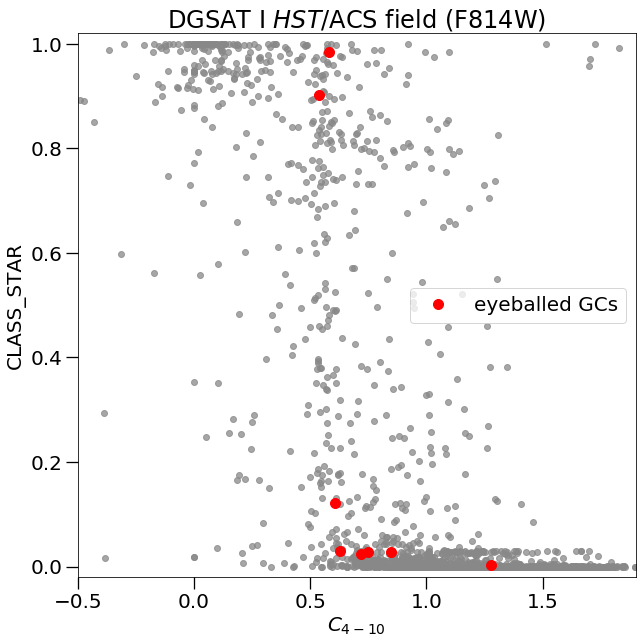

In [15]:
fig6 = figure(figsize=(10,10))
plot(C410i,classi,'o',c='#888888',alpha=0.75)
plot(C410i[GC_eye],classi[GC_eye],'or',ms=10,label='eyeballed GCs')
legend(loc='best')
ylabel('CLASS_STAR')
xlabel('$C_{4-10}$')
xlim(-0.5,1.9); ylim(-0.02,1.02)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field (F814W)')
#grid('on')
#savefig('DGSATI-HST_fig6.png')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field')

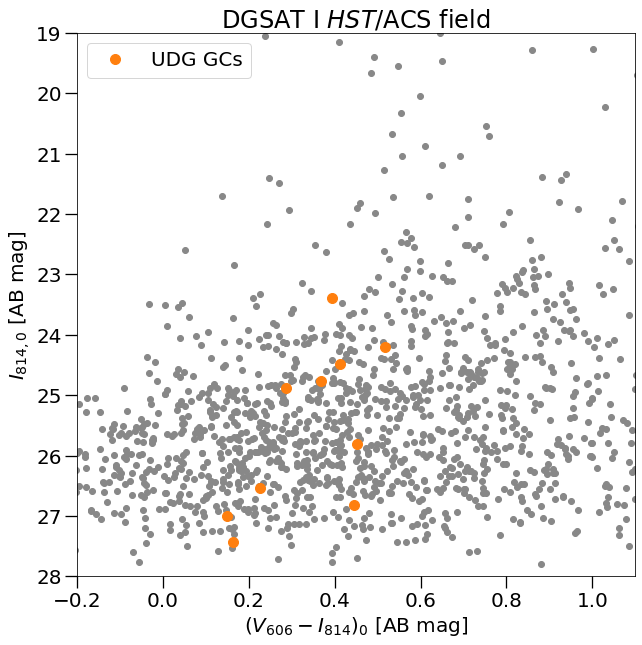

In [16]:
fig7 = figure(figsize=(10,10))
#plot(v_i,mi,'o',c='#888888')
plot(v_i0,mi0,'o',c='#888888')
#plot(v_i[UDG_GC],mi[UDG_GC],'or')
plot(v_i0[UDG_GC],mi0[UDG_GC],'o',c='C1',ms=10,label='UDG GCs')
legend(loc='best')
#xlabel('(F606W$-$F814W)$_0$ [AB mag]')
xlabel('$(V_{606}-I_{814})_0$ [AB mag]')
#ylabel('$m_\mathrm{F814W,0}$ [AB mag]')
ylabel('$I_\mathrm{814,0}$ [AB mag]')
#xlim(-0.3,4); ylim(28,15)
xlim(-0.2,1.1); ylim(28,19.0)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field')

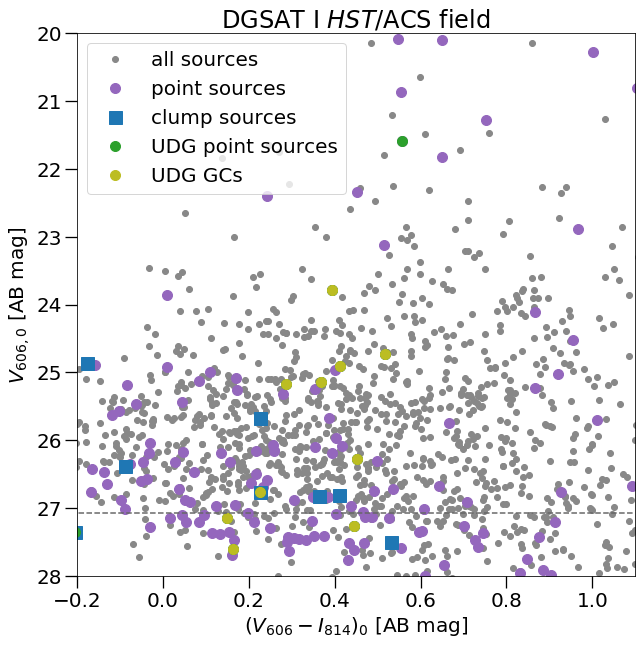

In [17]:
fig8 = figure(figsize=(10,10))
plot(v_i0,mv0,'o',c='#888888',label='all sources')
plot(v_i0[pt410i],mv0[pt410i],'o',c='C4',ms=10,label='point sources')
plot(v_i0[clump],mv0[clump],'s',c='C0',ms=13,label='clump sources')
plot(v_i0[UDG_pt],mv0[UDG_pt],'o',c='C2',ms=10,label='UDG point sources')
plot(v_i0[UDG_GC],mv0[UDG_GC],'o',c='C8',ms=10,label='UDG GCs')
plot([-1,4],[27.07,27.07],'--',c='#666666') # GC TOM
legend(loc='best')
xlabel('$(V_{606}-I_{814})_0$ [AB mag]')
ylabel('$V_\mathrm{606,0}$ [AB mag]')
xlim(-0.2,1.1); ylim(28,20.0)
#xlim(-1,3); ylim(28,16)
#xlim(-0.9,2.9); ylim(30.5,18)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field')
#grid('on')

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field')

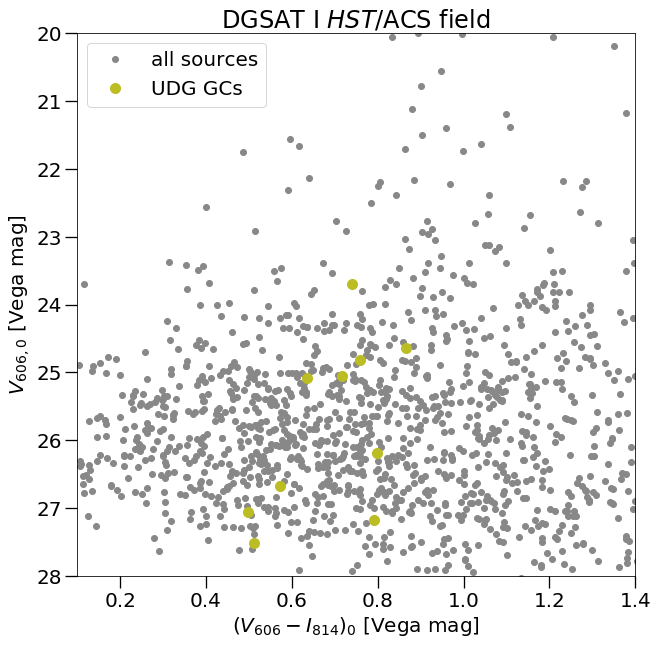

In [18]:
fig8b = figure(figsize=(10,10))
plot(v_iV0,mvV0,'o',c='#888888',label='all sources')
plot(v_iV0[UDG_GC],mvV0[UDG_GC],'o',c='C8',ms=10,label='UDG GCs')
legend(loc='best')
xlabel('$(V_{606}-I_{814})_0$ [Vega mag]')
ylabel('$V_\mathrm{606,0}$ [Vega mag]')
xlim(0.1,1.4); ylim(28,20.0)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field')
#grid('on')
#can be compared to Madrid+09 for M87

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field')

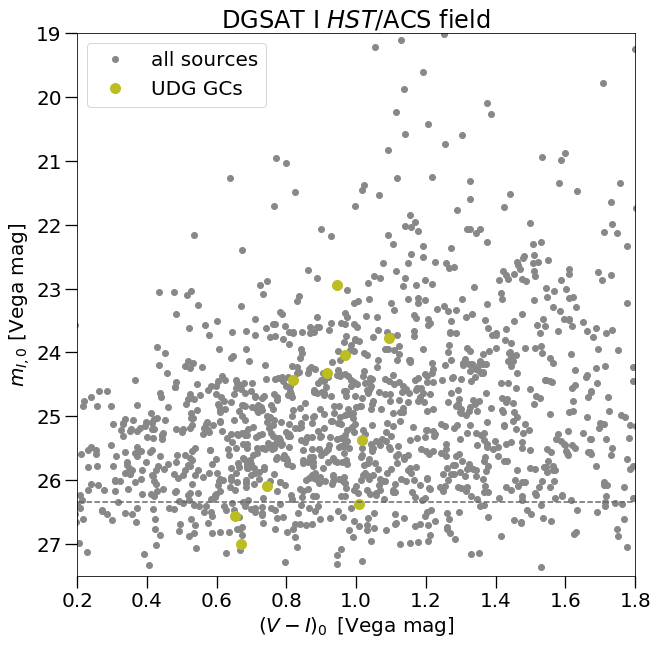

In [19]:
fig9 = figure(figsize=(10,10))
#plot(V_I,mi,'o',c='#888888')
#plot(V_I0,mi0,'o',c='#888888')
plot(V_I0,mI0,'o',c='#888888',label='all sources')
plot(V_I0[UDG_GC],mI0[UDG_GC],'o',c='C8',ms=10,label='UDG GCs')
plot([0,4],[26.34,26.34],'--',c='#666666') # GC TOM
#plot(V_I0[GC_eye],mi0[GC_eye],'or')
#plot(V_I0[GC],mi0[GC],'or')
legend(loc='best')
xlabel('$(V-I)_0 \,$ [Vega mag]')
#ylabel('$m_\mathrm{F814W,0}$ [AB mag]')
ylabel('$m_{I,0}$ [Vega mag]')
#xlim(0.0,3.0); ylim(27.5,14.5)
xlim(0.2,1.8); ylim(27.5,19.0)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field')
#grid('on')
#can be compared to Peng+09 for M87

Text(0.5, 1.0, 'DGSAT I $\\mathit{HST}$/ACS field')

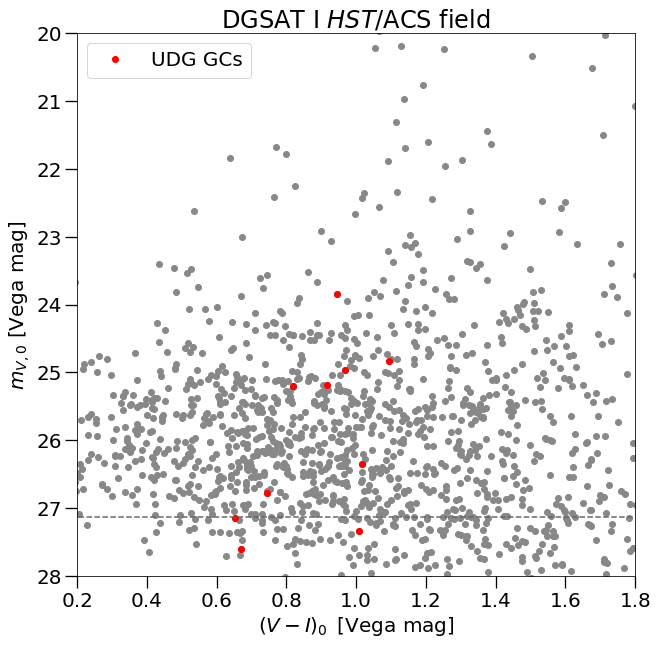

In [20]:
fig10 = figure(figsize=(10,10))
plot(V_I0,mV0,'o',c='#888888')
plot(V_I0[UDG_GC],mV0[UDG_GC],'or',label='UDG GCs')
plot([0,4],[27.12,27.12],'--',c='#666666') # GC TOM
legend(loc='best')
xlabel('$(V-I)_0 \,$ [Vega mag]')
ylabel('$m_{V,0}$ [Vega mag]')
xlim(0.2,1.8); ylim(28.0,20.0)
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field')
#grid('on')

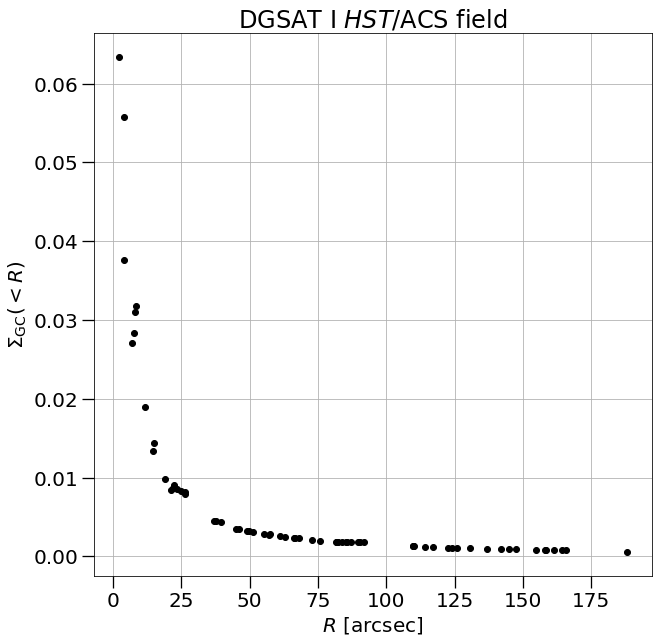

In [24]:
fig11 = figure(figsize=(10,10))
plot(R_GC,Sig_GC,'ok') # starts getting vignetted at ~46 arcsec
#semilogy(R_GC,Sig_GC,'ok')
#loglog(R_GC,Sig_GC,'ok')
xlabel('$R \,\, \mathrm{[arcsec]}$')
ylabel('$\Sigma_\mathrm{GC}(<R)$')
tick_params('both', length=12, width=1.3, which='major')
title('DGSAT I $\mathit{HST}$/ACS field')
grid('on')